# ** please load your data below the code :)**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#two types allowed to load xlsx or csv files
class Load_data:
    def __init__(self, file_name=None):
        self.df = None
        if file_name:
            try:
                file_extension = file_name.split('.')[-1].lower() 
                if file_extension == 'xlsx' or file_extension == 'xls':
                    self.df = pd.read_excel(file_name)  
                    print("Data successfully loaded")
                elif file_extension == 'csv':
                    self.df = pd.read_csv(file_name)
                    print("Data successfully loaded")
                else:
                    print("Unsupported file format.")
            except Exception as e:
                print("Error loading data")
        else:
            print("No file path provided.")
    
    def Data_overview(self): 
        if self.df is not None:
            print(self.df.info())
            print(f"\nShape: {self.df.shape}, Data types:\n{self.df.dtypes}")
            print(f"\nMissing values:\n{self.df.isnull().sum()}")
            print(f"\nUnique values per column:\n{self.df.nunique()}")
        else:
            print("Data not loaded. Please provide a valid file path.")


In [7]:
class DataProcessing(Load_data):
    def __init__(self, file_name):
        super().__init__(file_name)
        #handling missing vlaues:
        self.df["Exit Date"] = self.df["Exit Date"].fillna(pd.to_datetime("2050-12-31"))  # Fill null with a far-future date to represent ongoing employment
        self.df['Full Name'] = self.df['Full Name'].fillna('Unknown')
        self.df['Job Title'] = self.df['Job Title'].fillna('Unknown')
        self.df['Department'] = self.df['Department'].fillna('Not Assigned')
        self.df['Gender'] = self.df['Gender'].fillna('Not Provided')
        self.df['Ethnicity'] = self.df['Ethnicity'].fillna('Not Provided')
        self.df['Age'] = self.df['Age'].fillna(self.df['Age'].mean()) #fill age with the mean vlaue of column age
        self.df['Hire Date'] = self.df['Hire Date'].fillna(pd.to_datetime('1900-01-01')) #fill hire date with random data
        self.df['Annual Salary'] = self.df['Annual Salary'].fillna(self.df['Annual Salary'].median()) #fill salary with median since CEOs can be outliers :D
        self.df['Bonus %'] = self.df['Bonus %'].fillna(self.df['Bonus %'].mean())
        self.df['Country'] = self.df['Country'].fillna('Not Provided')
        self.df['City'] = self.df['City'].fillna('Not Provided')
    def ShowData_after_processing(self):
        self.Data_overview()
    def save_processing_as_new_file(self, directory): #the user will provide the directory only
        file_name = "Processed_Employee_Data"
        full_file_path = f"{directory}\\{file_name}.xlsx"
        self.df.to_excel(full_file_path, index=False)
        print("Data successfully saved ")

In [8]:
class Data_analysis(DataProcessing):
    def __init__(self,file_name):
        super().__init__(file_name)
    def group_data(self):
        print("\nAverage Age and Salary by Department:")
        print(self.df.groupby('Department')[['Age', 'Annual Salary']].mean())
        print("\nMax Age, Min Age, and Median Salary by Department and Ethnicity:")
        print(self.df.groupby(['Department', 'Ethnicity'])[['Age', 'Annual Salary']].agg(['max', 'min', 'median']))
    def employment_with_largest_salary(self):
       max_salary = self.df['Annual Salary'].max()
       print("\nThe employee with the highest salary")
       print(self.df[self.df['Annual Salary'] == max_salary])



In [9]:
data = Data_analysis(r"C:\Users\Estarta\Desktop\Project\Employee_Sample_Data.xlsx")
data.Data_overview()
data.save_processing_as_new_file(r"C:\Users\Estarta\Desktop\Project")
data.group_data()
data.employment_with_largest_salary()

Data successfully loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   float64       
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   float64       
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memo

In [12]:
class Visualization(Data_analysis):
    def __init__(self, filename):
        super().__init__(filename)
        gender_counts = self.df['Gender'].value_counts() #count_values
        gender_counts = gender_counts[gender_counts.index.isin(['Male', 'Female'])]  #excluding any other gender values.
        plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'], shadow=True, explode=[0.1, 0])
        plt.title('Gender Distribution in the Company', fontsize=14)
        plt.show()

    def Gender_based_analysis(self, gender):
        gender_df = self.df[self.df['Gender'] == gender] #filter data based on the gender
        self.plot_age_distribution(gender_df, gender)
        self.plot_salary_distribution(gender_df, gender)
        self.plot_exit_trend(gender_df, gender) 

    def plot_age_distribution(self, gender_df, gender):
        plt.hist(gender_df['Age'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'{gender} Age Distribution', fontsize=14)
        plt.xlabel('Age')
        plt.ylabel('Number of Employees')
        plt.grid(True) 
        plt.show()

    def plot_salary_distribution(self, gender_df, gender):
        plt.hist(gender_df['Annual Salary'], bins=10, color='orange', edgecolor='black', alpha=0.7)
        plt.title(f'{gender} Salary Distribution', fontsize=14)
        plt.xlabel('Annual Salary ($)')
        plt.ylabel('Number of Employees')
        plt.grid(True)
        plt.show()

    def plot_exit_trend(self, gender_df, gender):
        gender_df['Exit Date'] = pd.to_datetime(gender_df['Exit Date'])
        exit_df = gender_df[gender_df['Exit Date'] != pd.to_datetime("2050-12-31")]
        exit_trend = exit_df.groupby(exit_df['Exit Date'].dt.to_period('Y')).size()
        exit_trend.plot(kind='line', marker='o', color='b', figsize=(10, 6))
        plt.title(f'{gender} Exit Trend', fontsize=14)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Number of Exits', fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Data successfully loaded


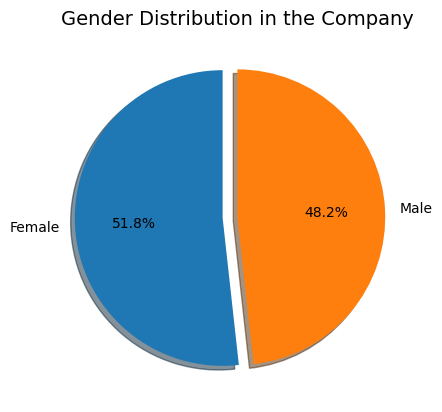

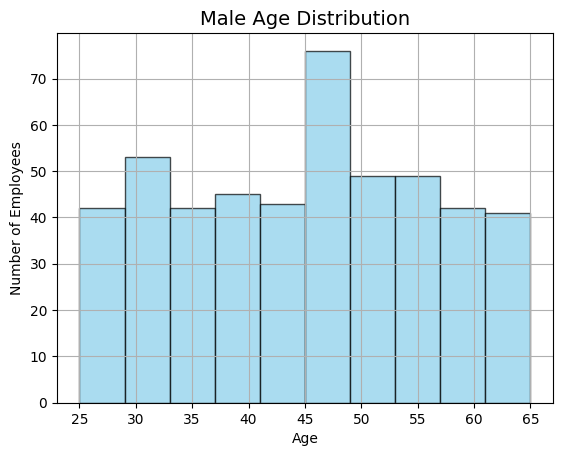

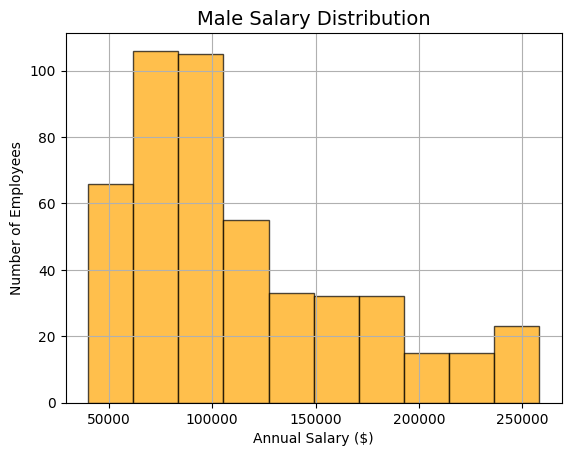

C:\Users\Estarta\AppData\Local\Temp\ipykernel_17800\1104822693.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df['Exit Date'] = pd.to_datetime(gender_df['Exit Date'])


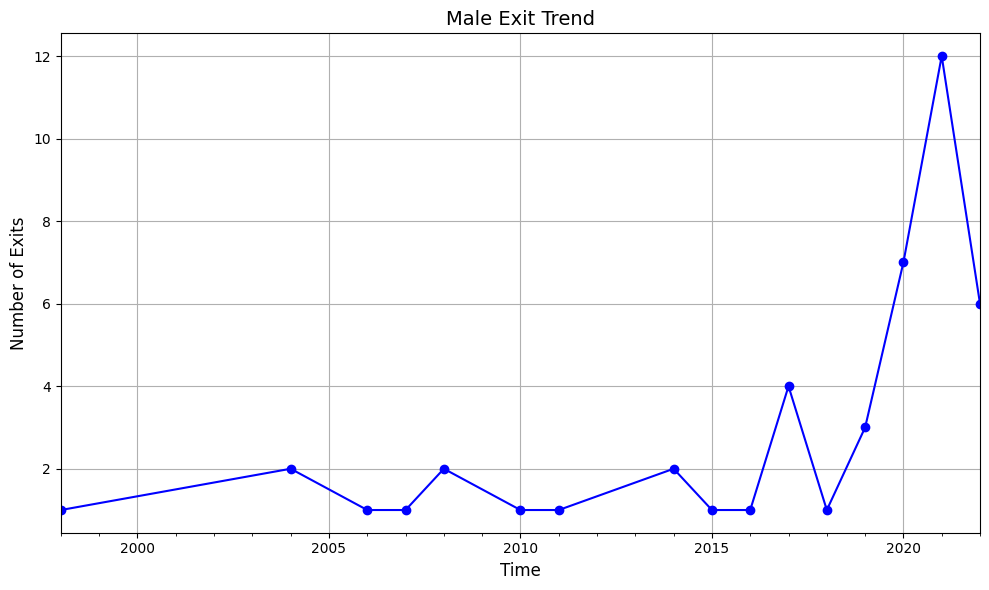

In [11]:
one = Visualization(r"C:\Users\Estarta\Desktop\Project\Employee_Sample_Data.xlsx")
one.Gender_based_analysis("Male")
